# 상영 국가와 viewpoint 분석 (자막 제공 국가)

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

# 데이터 시각화
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 가설검정
from scipy import stats

# 경고문구 무시
import warnings
warnings.filterwarnings("ignore")
# 자연어 처리
# import spacy

## 데이터 정보 확인

In [2]:
df=pd.read_csv('../data/1_original_useDf_0711.csv')

In [3]:
df.head(1)

,Num,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,7.3,96.0,91.0,96.0,97.0,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0


In [4]:
# null값 확인
df.isnull().sum()

Num                         0
Title                       0
Series or Movie             0
COUNTRY                   206
Release Date               65
GENRE                     370
VALUE                       0
Genre_all                 118
Tags                        9
Languages                 149
Hidden Gem Score          152
Country Availability        5
Runtime                     0
Director                  713
Writer                    514
Actors                    138
View Rating               708
IMDb Score                152
Rotten Tomatoes Score    1385
Metacritic Score         1510
Awards Received          1490
Awards Nominated For     1090
Boxoffice                1665
Netflix Release Date        0
Production House         1492
Summary                     2
IMDb Votes                152
dtype: int64

In [5]:
df.describe().round()

,Num,VALUE,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,2960.0,2960.0,2808.0,2808.0,1575.0,1450.0,1470.0,1870.0,2808.0
mean,1480.0,634.0,5.0,6.0,54.0,54.0,11.0,21.0,94402.0
std,855.0,2202.0,2.0,1.0,27.0,17.0,24.0,41.0,190158.0
min,0.0,1.0,1.0,2.0,0.0,5.0,1.0,1.0,5.0
25%,740.0,22.0,3.0,6.0,30.0,41.0,2.0,3.0,1759.0
50%,1480.0,80.0,4.0,6.0,54.0,53.0,4.0,7.0,17586.0
75%,2219.0,321.0,7.0,7.0,78.0,66.0,10.0,19.0,107313.0
max,2959.0,44867.0,10.0,10.0,100.0,100.0,300.0,386.0,2308981.0


# viewpoint 정규화

## min-max 정규화 실시

In [6]:
df['VALUE_std']=(df['VALUE']-df['VALUE'].min())/df['VALUE'].max()

## 표준화 실시

In [7]:
df['VALUE_norm']=(df['VALUE']-df['VALUE'].mean())/df['VALUE'].std()

# Country_all 변수 추가 (COUNTRY 와 Country Availability 결합)

In [8]:
df['country_all']=df['COUNTRY']+','+ df['Country Availability']

## 전체 국가수 리스트에서 중복 제거 및 카운트 수 바꾸기

In [9]:
revise_country = df['country_all'].str.split(',') #리스트화

In [10]:
# 중복값 제거
for i in range(int(len(revise_country))):
     revise_country[i]= np.unique(revise_country[i]).tolist()

In [11]:
revise_country = pd.DataFrame(revise_country)

In [12]:
revise_country

,country_all
0,"[Argentina, Australia, Belgium, Brazil, Canada..."
1,"[Argentina, Australia, Belgium, Brazil, Canada..."
2,"[Argentina, Australia, Belgium, Brazil, Canada..."
3,"[Argentina, Australia, Belgium, Brazil, Canada..."
4,"[Argentina, Australia, Belgium, Brazil, Canada..."
...,...
2955,"[Argentina, Australia, Belgium, Brazil, Colomb..."
2956,"[Canada, Czech Republic, Hungary, Romania, Sou..."
2957,"[Germany, India, United States]"
2958,"[Argentina, Australia, Brazil, Canada, Colombi..."


In [13]:
df['country_all'] = revise_country

In [14]:
df

,Num,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes,VALUE_std,VALUE_norm,country_all
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,96.0,97.0,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0,0.999978,20.086441,"[Argentina, Australia, Belgium, Brazil, Canada..."
1,1,365days,Movie,Poland,2020.6.7,Romance,42149,"Drama, Romance","Polish Movies,Polish Dramas,Dramas,Romantic Dr...","Polish, English, Italian",...,NaN,NaN,NaN,2020.4.2,NaN,A fiery executive in a spiritless relationship...,50125.0,0.939399,18.852190,"[Argentina, Australia, Belgium, Brazil, Canada..."
2,2,emilyinparis,TV,United States,2020.10.2,Drama,27138,"Comedy, Drama, Romance","Comedy Programmes,Drama Programmes,Romantic TV...","French, English",...,1.0,3.0,NaN,2020.10.2,NaN,"After landing her dream job in Paris, Chicago ...",45000.0,0.604832,12.035656,"[Argentina, Australia, Belgium, Brazil, Canada..."
3,3,lucifer,TV,United States,2016.1.25,Superhero,25729,"Horror, Thriller","TV Dramas,Police TV Shows,TV Sci-Fi & Fantasy,...",English,...,NaN,NaN,NaN,2017.7.24,NaN,"Bored with being the Lord of Hell, the devil r...",57.0,0.573428,11.395826,"[Argentina, Australia, Belgium, Brazil, Canada..."
4,4,theumbrellaacademy,TV,United States,2019.2.15,Superhero,23480,"Action, Adventure, Comedy, Drama, Fantasy, Sci-Fi","TV Sci-Fi & Fantasy,US TV Shows,TV Action & Ad...",English,...,7.0,28.0,NaN,2019.2.15,NaN,"Reunited by their fathers death, estranged sib...",159677.0,0.523302,10.374549,"[Argentina, Australia, Belgium, Brazil, Canada..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,2955,thebournesupremacy,Movie,United States,2004.7.23,Action,1,"Action, Mystery, Thriller","Action Thrillers,Spy Action & Adventure,Action...","English, Russian, German, Italian",...,5.0,22.0,"$176,241,941",2015.4.14,"Universal Pictures, Hypnotic, Kennedy/Marshall","Flushed from his refuge by an assassin, Jason ...",435887.0,0.000000,-0.287326,"[Argentina, Australia, Belgium, Brazil, Colomb..."
2956,2956,justfriends,Movie,United States,2005.11.23,Romance,1,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...",English,...,NaN,3.0,"$32,619,671",2015.4.14,"Cinerenta, Benderspink, Just Friends Productio...","Years after high school, a once-portly nice gu...",106951.0,0.000000,-0.287326,"[Canada, Czech Republic, Hungary, Romania, Sou..."
2957,2957,child44,Movie,United States,2015.3.15,Thriller,1,"Crime, Drama, History, Mystery, Thriller","Dramas based on a book,Dramas,Thrillers,Crime ...","English, Russian",...,NaN,2.0,"$1,224,330",2016.12.4,Scott Free Productions,"In 1950s Russia, a former war hero investigate...",66251.0,0.000000,-0.287326,"[Germany, India, United States]"
2958,2958,draculauntold,Movie,United States,2014.10.3,Horror,1,"Action, Drama, Fantasy, Horror, War","Horror Movies,Sci-Fi & Fantasy,Action & Advent...","English, Turkish",...,3.0,5.0,"$56,280,355",2016.3.28,Michael De Luca,A medieval warrior and ruler must become a vam...,180432.0,0.000000,-0.287326,"[Argentina, Australia, Brazil, Canada, Colombi..."


In [15]:
df['country_all'].head(3)

0    [Argentina, Australia, Belgium, Brazil, Canada...
1    [Argentina, Australia, Belgium, Brazil, Canada...
2    [Argentina, Australia, Belgium, Brazil, Canada...
Name: country_all, dtype: object

# showingOn_count 변수 추가

In [16]:
len(str(df['country_all'].iloc[0]).split(','))

36

In [17]:
rows = len(df['country_all'])

In [18]:
df['showingOn_count'] = 0

In [19]:
df['country_all']

0       [Argentina, Australia, Belgium, Brazil, Canada...
1       [Argentina, Australia, Belgium, Brazil, Canada...
2       [Argentina, Australia, Belgium, Brazil, Canada...
3       [Argentina, Australia, Belgium, Brazil, Canada...
4       [Argentina, Australia, Belgium, Brazil, Canada...
                              ...                        
2955    [Argentina, Australia, Belgium, Brazil, Colomb...
2956    [Canada, Czech Republic, Hungary, Romania, Sou...
2957                      [Germany, India, United States]
2958    [Argentina, Australia, Brazil, Canada, Colombi...
2959    [Argentina, Australia, Brazil, Canada, Colombi...
Name: country_all, Length: 2960, dtype: object

In [20]:
for i in range(rows):
    df.showingOn_count[i]=len(str(df['country_all'].iloc[i]).split(','))

In [21]:
df.head(5)

,Num,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes,VALUE_std,VALUE_norm,country_all,showingOn_count
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,97.0,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0,0.999978,20.086441,"[Argentina, Australia, Belgium, Brazil, Canada...",36
1,1,365days,Movie,Poland,2020.6.7,Romance,42149,"Drama, Romance","Polish Movies,Polish Dramas,Dramas,Romantic Dr...","Polish, English, Italian",...,NaN,NaN,2020.4.2,NaN,A fiery executive in a spiritless relationship...,50125.0,0.939399,18.852190,"[Argentina, Australia, Belgium, Brazil, Canada...",36
2,2,emilyinparis,TV,United States,2020.10.2,Drama,27138,"Comedy, Drama, Romance","Comedy Programmes,Drama Programmes,Romantic TV...","French, English",...,3.0,NaN,2020.10.2,NaN,"After landing her dream job in Paris, Chicago ...",45000.0,0.604832,12.035656,"[Argentina, Australia, Belgium, Brazil, Canada...",36
3,3,lucifer,TV,United States,2016.1.25,Superhero,25729,"Horror, Thriller","TV Dramas,Police TV Shows,TV Sci-Fi & Fantasy,...",English,...,NaN,NaN,2017.7.24,NaN,"Bored with being the Lord of Hell, the devil r...",57.0,0.573428,11.395826,"[Argentina, Australia, Belgium, Brazil, Canada...",35
4,4,theumbrellaacademy,TV,United States,2019.2.15,Superhero,23480,"Action, Adventure, Comedy, Drama, Fantasy, Sci-Fi","TV Sci-Fi & Fantasy,US TV Shows,TV Action & Ad...",English,...,28.0,NaN,2019.2.15,NaN,"Reunited by their fathers death, estranged sib...",159677.0,0.523302,10.374549,"[Argentina, Australia, Belgium, Brazil, Canada...",36


### 정규화 진행

In [22]:
# 정규화 진행

df['showingOn_count_norm'] = (df['showingOn_count'] - df['showingOn_count'].min())/df['showingOn_count'].max()  ## 

In [23]:
type(df.showingOn_count)

pandas.core.series.Series

# 상영 국가 수와 viewpoint

In [24]:
df.head(1)

,Num,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes,VALUE_std,VALUE_norm,country_all,showingOn_count,showingOn_count_norm
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0,0.999978,20.086441,"[Argentina, Australia, Belgium, Brazil, Canada...",36,0.945946


In [25]:
df_count = df[['Num','VALUE','showingOn_count']]

In [26]:
df_count.isnull().sum()

Num                0
VALUE              0
showingOn_count    0
dtype: int64

In [27]:
df_count.describe()

,Num,VALUE,showingOn_count
count,2960.000000,2960.000000,2960.000000
mean,1479.500000,633.733446,16.180405
std,854.622724,2202.145547,14.071531
min,0.000000,1.000000,1.000000
25%,739.750000,22.000000,3.000000
50%,1479.500000,80.000000,10.000000
75%,2219.250000,321.000000,35.000000
max,2959.000000,44867.000000,37.000000


In [28]:
df_count.head(5)

,Num,VALUE,showingOn_count
0,0,44867,36
1,1,42149,36
2,2,27138,36
3,3,25729,35
4,4,23480,36


In [29]:
len(df_count['showingOn_count'].unique())

37

## 카이제곱 검정
- 귀무가설 : 두 변수는 연관성이 없다. 차이가 없다.
 - => showingOn_count의 증감은 value와 상관성이 없다.
- 대립가설 : 두 변수는 연관성이 있다. 차이가 있다.
 - => showingOn_count의 증감은 value와 상관성이 있다.

In [30]:
value = list(df_count.VALUE)
showingOn_count=list(df_count.showingOn_count)

In [31]:
chis = stats.chisquare(value,showingOn_count)

In [32]:
statistic, pvalue = chis
print(f'static : {statistic}, p-value : {pvalue}')
if pvalue < 0.05 :
    print('신뢰수준하에서 유의한 관계. 대립가설 채택')
else :
    print('신뢰수준하에서 무의미한 관계. 귀무가설 채택')

static : 662445502.0556288, p-value : 0.0
신뢰수준하에서 유의한 관계. 대립가설 채택


In [33]:
#피어스만 상관계수
# corr=stats.pearsonr(df_count.VALUE, df_count.showingOn_count)
# corr

In [34]:
#스피어만 상관계수
corr1=stats.spearmanr(df_count.VALUE, df_count.showingOn_count)
corr1

SpearmanrResult(correlation=0.36410948919057506, pvalue=1.7730289195039006e-93)

In [35]:
df_count.corr(method='spearman')

,Num,VALUE,showingOn_count
Num,1.000000,-0.986816,-0.361110
VALUE,-0.986816,1.000000,0.364109
showingOn_count,-0.361110,0.364109,1.000000


In [36]:
df_count

,Num,VALUE,showingOn_count
0,0,44867,36
1,1,42149,36
2,2,27138,36
3,3,25729,35
4,4,23480,36
...,...,...,...
2955,2955,1,31
2956,2956,1,7
2957,2957,1,3
2958,2958,1,30


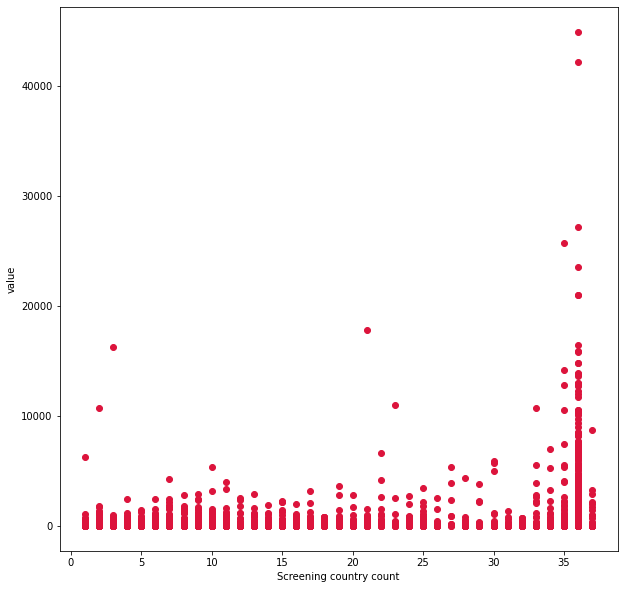

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(showingOn_count,value, c='crimson')
plt.xlabel('Screening country count')
plt.ylabel('value')
#plt.axis([0, 40, 0, 20000]) #구간 설정
plt.show()

- 카이 제곱 검정 결과 두 변수들간의 유의수준 0.05에서 showingOn_count의 증감은 value와의 상관성이 있다고 할 수 있다.
- 산점도와 상관계수를 확인을 해봤을 때, 양의 상관성이 있다고 볼 수 있다.

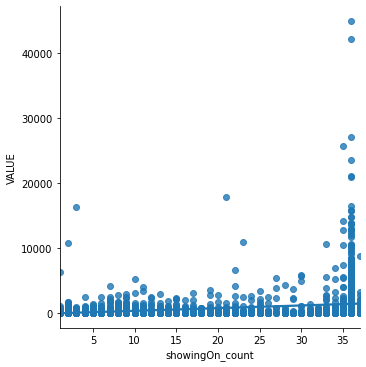

<Figure size 720x720 with 0 Axes>

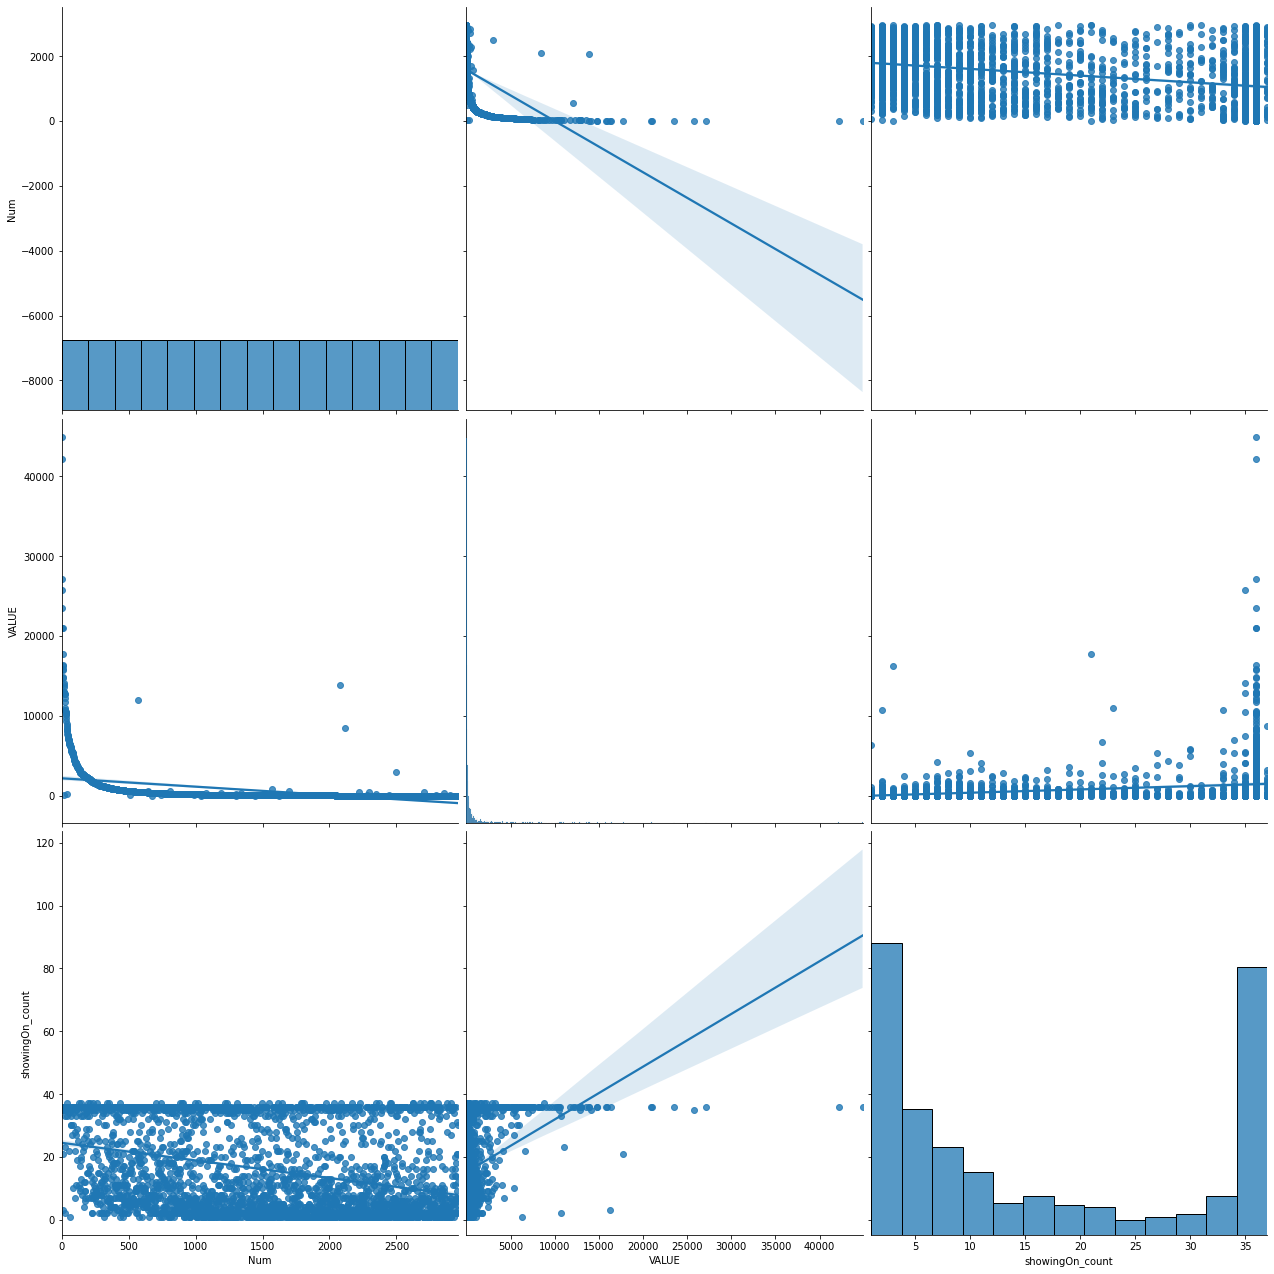

In [38]:
import seaborn as sns
ax=sns.lmplot(x='showingOn_count', y='VALUE', data=df_count, ci=None)
plt.figure(figsize=(10,10))

sns.pairplot(df_count, kind='reg', height=6)

In [39]:
df_count.profile_report()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## country_all과 viewpoint
- 귀무가설: 상영국가들은 viewpoint에 영향이 없다.
- 대립가설: 상영국가들은 viewpoint에 영향이 있다.

In [40]:
df_country=df[['Num','VALUE','country_all']]

In [41]:
df_country.head(1)

,Num,VALUE,country_all
0,0,44867,"[Argentina, Australia, Belgium, Brazil, Canada..."


In [42]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Num          2960 non-null   int64 
 1   VALUE        2960 non-null   int64 
 2   country_all  2960 non-null   object
dtypes: int64(2), object(1)
memory usage: 69.5+ KB


In [43]:
df_country.sort_values('Num', ascending = True, inplace=True)

In [44]:
df_view_top500 = df_country[:][:500]

**# 순위 기준 top500 country들을 country_single로 만듬**

In [45]:
df_view_top500.set_index('Num',inplace=True)

In [46]:
df_view_top500.head(10)

,VALUE,country_all
Num,,
0,44867,"[Argentina, Australia, Belgium, Brazil, Canada..."
1,42149,"[Argentina, Australia, Belgium, Brazil, Canada..."
2,27138,"[Argentina, Australia, Belgium, Brazil, Canada..."
3,25729,"[Argentina, Australia, Belgium, Brazil, Canada..."
4,23480,"[Argentina, Australia, Belgium, Brazil, Canada..."
5,21012,"[Argentina, Australia, Belgium, Brazil, Canada..."
6,20937,"[Argentina, Australia, Belgium, Brazil, Canada..."
7,17782,"[Australia, Belgium, France, Germany, Greece, ..."
8,16427,"[Argentina, Australia, Belgium, Brazil, Canada..."


In [47]:
result = df_view_top500['country_all']

In [48]:
result = result.apply(lambda x: pd.Series(x))

In [49]:
result = result.stack().reset_index(level=1, drop=True).to_frame('country_single')
result

,country_single
Num,
0,Argentina
0,Australia
0,Belgium
0,Brazil
0,Canada
...,...
499,Greece
499,India
499,Israel


In [50]:
rs = result.reset_index()

In [51]:
rs.head(2)

,Num,country_single
0,0,Argentina
1,0,Australia


In [52]:
rs.count

<bound method DataFrame.count of        Num country_single
0        0      Argentina
1        0      Australia
2        0        Belgium
3        0         Brazil
4        0         Canada
...    ...            ...
12986  499         Greece
12987  499          India
12988  499         Israel
12989  499         Mexico
12990  499  United States

[12991 rows x 2 columns]>

In [53]:
len(rs['country_single'].unique())

48

## 전체 상영국가 카운트 수 확인 및 빈도수를 워드클라우드로 시각화

**전체 상영국가별 카운트 수 확인 및 빈도 수를 워드클라우드로 시각화**

In [54]:
from collections import Counter

### 전체 데이터셋에서 상영국가 리스트를 싱글로 변환

In [55]:
df_view = df_country.set_index('Num')

In [56]:
len(df_view['country_all'])

2960

In [57]:
df_view['country_all']

Num
0       [Argentina, Australia, Belgium, Brazil, Canada...
1       [Argentina, Australia, Belgium, Brazil, Canada...
2       [Argentina, Australia, Belgium, Brazil, Canada...
3       [Argentina, Australia, Belgium, Brazil, Canada...
4       [Argentina, Australia, Belgium, Brazil, Canada...
                              ...                        
2955    [Argentina, Australia, Belgium, Brazil, Colomb...
2956    [Canada, Czech Republic, Hungary, Romania, Sou...
2957                      [Germany, India, United States]
2958    [Argentina, Australia, Brazil, Canada, Colombi...
2959    [Argentina, Australia, Brazil, Canada, Colombi...
Name: country_all, Length: 2960, dtype: object

In [58]:
# country_all 덮어쓴거 적용하기
result_ALL_country = df_view['country_all']
result_ALL_country = result_ALL_country.apply(lambda x: pd.Series(x))
result_ALL_country = result_ALL_country.stack().reset_index(level=1, drop=True).to_frame('country_single')
result_ALL_country=result_ALL_country.reset_index()

In [59]:
country_counter = Counter(result_ALL_country.country_single)

In [70]:
country_counter

Counter({'Argentina': 1316,
         'Australia': 1319,
         'Belgium': 1408,
         'Brazil': 1280,
         'Canada': 1378,
         'Colombia': 1313,
         'Czech Republic': 1433,
         'France': 1323,
         'Germany': 1347,
         'Greece': 1231,
         'Hong Kong': 1257,
         'Hungary': 1396,
         'Iceland': 1109,
         'India': 1269,
         'Israel': 1203,
         'Italy': 1297,
         'Japan': 1374,
         'Lithuania': 1170,
         'Malaysia': 1245,
         'Mexico': 1315,
         'Netherlands': 1310,
         'Poland': 1326,
         'Portugal': 1207,
         'Romania': 1360,
         'Russia': 1155,
         'Singapore': 1266,
         'Slovakia': 1338,
         'South Africa': 1218,
         'South Korea': 1185,
         'Spain': 1251,
         'Sweden': 1273,
         'Switzerland': 1392,
         'Thailand': 1290,
         'Turkey': 1301,
         'United Kingdom': 1446,
         'United States': 2181,
         'China': 14,
        

In [60]:
df_view['country_all']

Num
0       [Argentina, Australia, Belgium, Brazil, Canada...
1       [Argentina, Australia, Belgium, Brazil, Canada...
2       [Argentina, Australia, Belgium, Brazil, Canada...
3       [Argentina, Australia, Belgium, Brazil, Canada...
4       [Argentina, Australia, Belgium, Brazil, Canada...
                              ...                        
2955    [Argentina, Australia, Belgium, Brazil, Colomb...
2956    [Canada, Czech Republic, Hungary, Romania, Sou...
2957                      [Germany, India, United States]
2958    [Argentina, Australia, Brazil, Canada, Colombi...
2959    [Argentina, Australia, Brazil, Canada, Colombi...
Name: country_all, Length: 2960, dtype: object

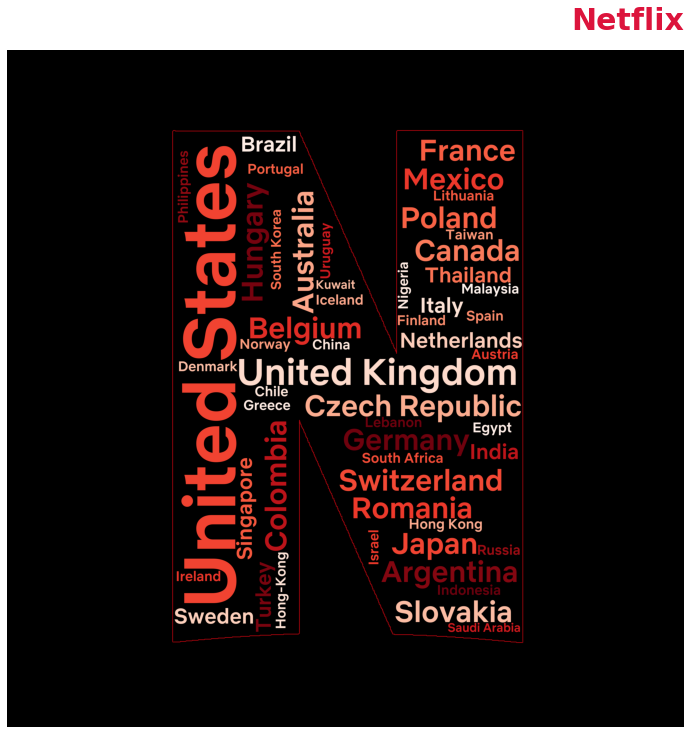

In [375]:
# 넷플릭스 심볼 이미지대로 워드클라우드 구름모양 만들기
from PIL import Image

mask = Image.open('./Netflix-3.png')
mask = np.array(mask)

wordcloud = WordCloud(scale=3,# 단어별 빈도수로 워드 클라우드 작성 
                font_path='font/NetflixSansMedium.ttf',
                background_color ='black',
                max_font_size=130,
                colormap ='Reds',
                mask= mask,
                contour_color='#b1060f',            
                contour_width=2, 
                repeat=True,
                prefer_horizontal=0.8,
                min_font_size = 20).generate_from_frequencies(country_counter)
# image_colors = ImageColorGenerator(mask)
# wordcloud = wordcloud.recolor(color_func=image_colors)

plt.figure(figsize = (10, 10), facecolor = None) 
title_font = {
    'fontsize': 30,
    'fontweight': 'bold',
    'color' : 'crimson'
}
plt.title('Netflix', loc='right', pad=20, fontdict=title_font)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

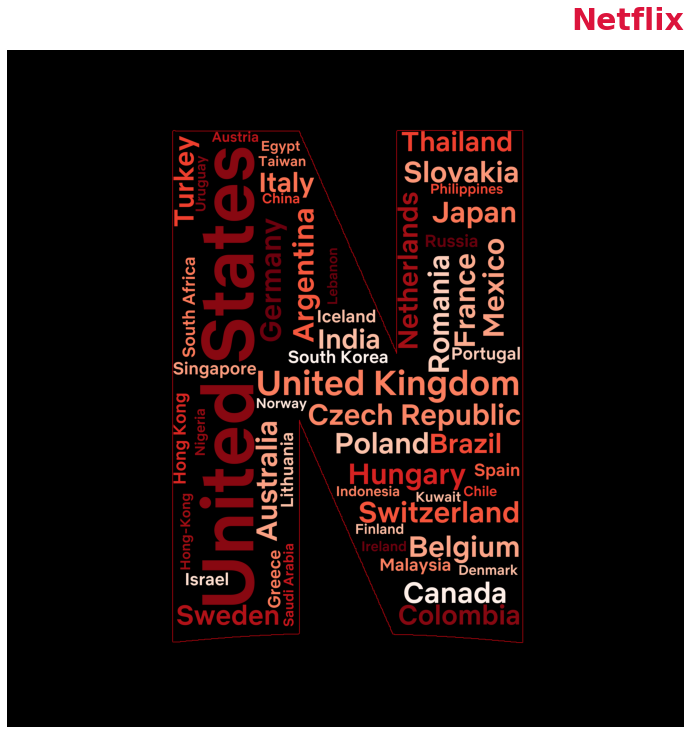

In [374]:
from PIL import Image

mask = Image.open('./Netflix-3.png')
mask = np.array(mask)

wordcloud = WordCloud(scale=3,# 단어별 빈도수로 워드 클라우드 작성 
                font_path='font/NetflixSansMedium.ttf',
                background_color ='black',
                max_font_size=130,
                colormap ='Reds',
                mask= mask,
                contour_color='#b1060f',            
                contour_width=2, 
                repeat=True,
                prefer_horizontal=0.8,
                min_font_size = 20).generate_from_frequencies(country_counter)
# image_colors = ImageColorGenerator(mask)
# wordcloud = wordcloud.recolor(color_func=image_colors)

plt.figure(figsize = (10, 10), facecolor = None) 
title_font = {
    'fontsize': 30,
    'fontweight': 'bold',
    'color' : 'crimson'
}
plt.title('Netflix', loc='right', pad=20, fontdict=title_font)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

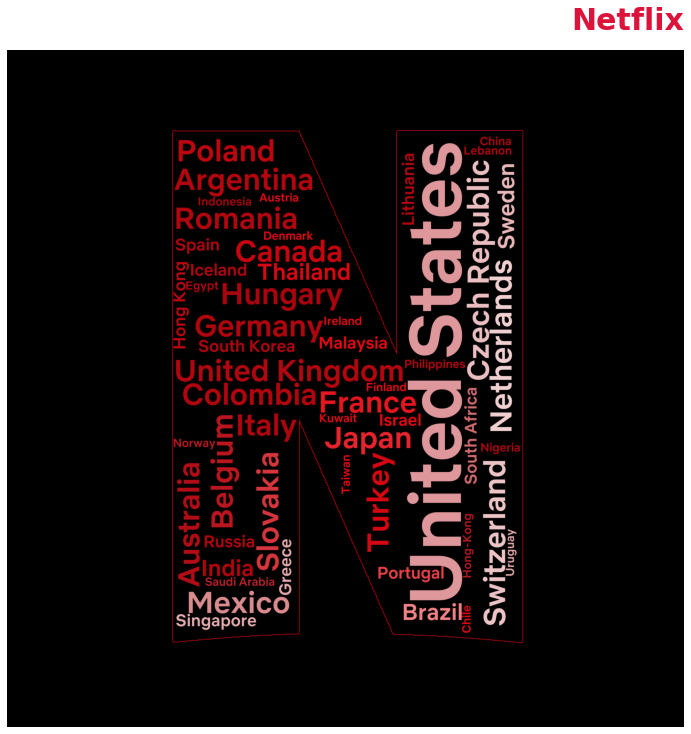

In [368]:
from PIL import Image

mask = Image.open('./Netflix-3.png')
mask = np.array(mask)

wordcloud = WordCloud(scale=3,# 단어별 빈도수로 워드 클라우드 작성 
                font_path='font/NetflixSansMedium.ttf',
                background_color ='black',
                max_font_size=130,
                colormap ='Reds',
                mask= mask,
                contour_color='#b1060f',            
                contour_width=2, 
                repeat=True,
                prefer_horizontal=0.8,
                min_font_size = 20).generate_from_frequencies(country_counter)
image_colors = ImageColorGenerator(mask)
wordcloud = wordcloud.recolor(color_func=image_colors)

plt.figure(figsize = (10, 10), facecolor = None) 
title_font = {
    'fontsize': 30,
    'fontweight': 'bold',
    'color' : 'crimson'
}
plt.title('Netflix', loc='right', pad=20, fontdict=title_font)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

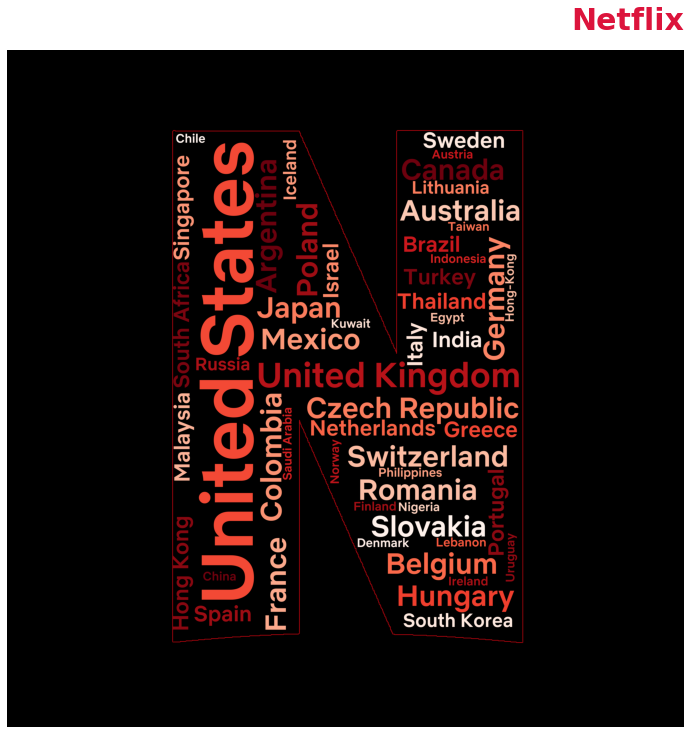

In [367]:
from PIL import Image

mask = Image.open('./Netflix-3.png')
mask = np.array(mask)

wordcloud = WordCloud(scale=3,# 단어별 빈도수로 워드 클라우드 작성 
                font_path='font/NetflixSansMedium.ttf',
                background_color ='black',
                max_font_size=130,
                colormap ='Reds',
                mask= mask,
                contour_color='#b1060f',
                contour_width=2,
                repeat=True,
                prefer_horizontal=0.8,
                min_font_size = 20).generate_from_frequencies(country_counter)
# image_colors = ImageColorGenerator(mask)
# wordcloud = wordcloud.recolor(color_func=image_colors)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
title_font = {
    'fontsize': 30,
    'fontweight': 'bold',
    'color' : 'crimson'
}
plt.title('Netflix', loc='right', pad=20, fontdict=title_font)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

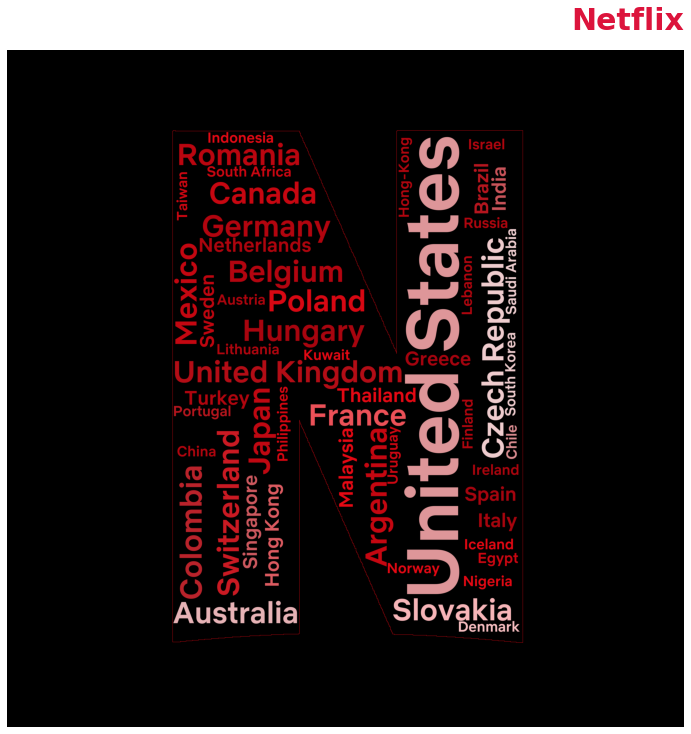

In [355]:
from PIL import Image

mask = Image.open('./Netflix-3.png')
mask = np.array(mask)

wordcloud = WordCloud(scale=3,# 단어별 빈도수로 워드 클라우드 작성 
                font_path='font/NetflixSansMedium.ttf',
                background_color ='black',
                max_font_size=130,
                colormap ='Reds',
                mask= mask,
                contour_color='#b1060f',
                contour_width=1, 
                repeat=True,
                prefer_horizontal=0.8,
                min_font_size = 20).generate_from_frequencies(country_counter)
image_colors = ImageColorGenerator(mask)
wordcloud = wordcloud.recolor(color_func=image_colors)

plt.figure(figsize = (10, 10), facecolor = None) 
title_font = {
    'fontsize': 30,
    'fontweight': 'bold',
    'color' : 'crimson'
}
plt.title('Netflix', loc='right', pad=20, fontdict=title_font)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

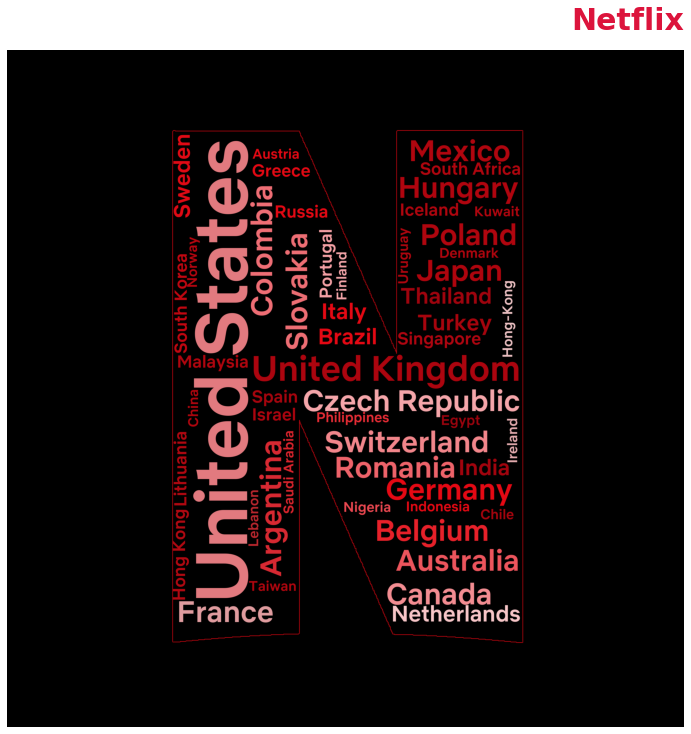

In [366]:
from PIL import Image

mask = Image.open('./Netflix-3.png')
mask = np.array(mask)

wordcloud = WordCloud(scale=3,# 단어별 빈도수로 워드 클라우드 작성 
                font_path='font/NetflixSansMedium.ttf',
                background_color ='black',
                max_font_size=130,
                colormap ='Reds',
                mask= mask,
                contour_color='#b1060f',
                contour_width=2, 
                repeat=True,
                prefer_horizontal=0.8,
                min_font_size = 20).generate_from_frequencies(country_counter)
image_colors = ImageColorGenerator(mask)
wordcloud = wordcloud.recolor(color_func=image_colors)

plt.figure(figsize = (10, 10), facecolor = None) 
title_font = {
    'fontsize': 30,
    'fontweight': 'bold',
    'color' : 'crimson'
}
plt.title('Netflix', loc='right', pad=20, fontdict=title_font)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# 상영 국가 빈도수와 viewpoint와 상관성이 있을지?

viewpoint 상위 500개의 상영국가 빈도수와 viewpoint 간의 상관성 시각화

In [61]:
#전체 데이터셋에서 country_all 개수
country_counter = dict(country_counter)

In [62]:
df_count = pd.DataFrame(pd.Series(country_counter), columns = ['counter'])

In [63]:
df_count.head(1) # Argentina 국가에서는 1316개 콘텐츠를 넷플릭스가 자막지원하여 볼 수 있다.

,counter
Argentina,1316


In [64]:
# 카운트수를 기준으로 내림차순
df_count.sort_values(by = 'counter',ascending = False,inplace = True)

In [65]:
df_count=df_count.reset_index()

In [66]:
df_count.columns = ['country', 'counter']

In [67]:
# 전체 데이터셋에서 상위 15개 country 수 
df_country_top15= df_count[:][:15]

In [68]:
df_country_top15.head(15)

,country,counter
0,United States,2181
1,United Kingdom,1446
2,Czech Republic,1433
3,Belgium,1408
4,Hungary,1396
5,Switzerland,1392
6,Canada,1378
7,Japan,1374
8,Romania,1360
9,Germany,1347


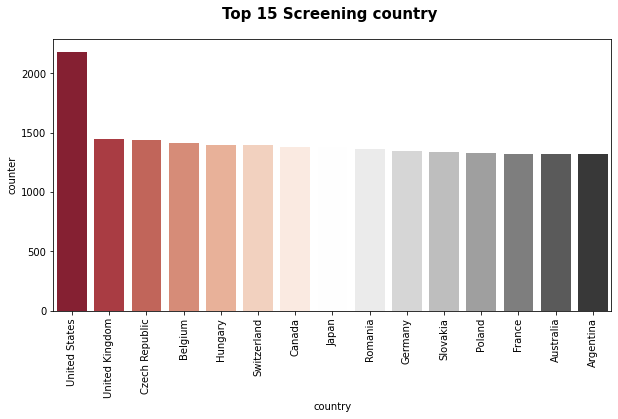

In [69]:
from matplotlib import gridspec
import matplotlib
import matplotlib.pyplot as plt



# 전체 데이터 셋에서 top 500 태그들의 분포

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(nrows=1, ncols=1)
                       #height_ratios=[1, 0.7]) 
                       #width_ratios=[17, 17])

ax = plt.subplot(gs[0])
sns.barplot(df_country_top15['country'], df_country_top15['counter'], ax=ax, palette="RdGy")
ax.set_xticklabels(df_country_top15['country'], rotation='90')
ax.set_title('Top 15 Screening country ',fontsize=15, fontweight='bold',pad=20)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
plt.show()

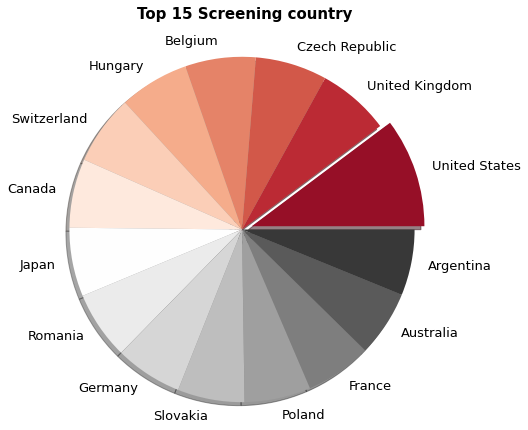

In [70]:

fig = plt.figure(figsize=(7,7))
gs = gridspec.GridSpec(nrows=1, ncols=1)
explode = [0 for _ in range(15)]
explode[0] = 0.06

ax2 = plt.subplot(gs[0])
ax2.pie(df_country_top15['counter'], labels=df_country_top15['country'],
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=15),textprops={'fontsize':13}
       )
ax2.axis('equal') 
ax2.set_title('Top 15 Screening country ',fontsize=15, fontweight='bold', pad=20)
# matplotlib.rc('xtick', labelsize=10) 
# matplotlib.rc('ytick', labelsize=10)
plt.show()

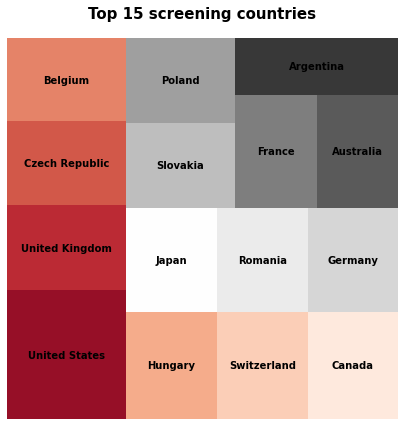

In [71]:
import squarify

fig = plt.figure(figsize=(7, 7))
squarify.plot(sizes = df_country_top15['counter'], label = df_country_top15['country'], color=sns.color_palette("RdGy", n_colors=15),
             linewidth=4, text_kwargs={'fontsize':10, 'fontweight' : 'bold'})
plt.title('Top 15 screening countries', position=(0.5, 1.0+0.03), fontsize = 15, fontweight='bold',pad=20)
plt.axis('off')
plt.show()

In [72]:
df_country_top10= df_count[:][:10]

In [73]:
df_country_top10.head(10)

,country,counter
0,United States,2181
1,United Kingdom,1446
2,Czech Republic,1433
3,Belgium,1408
4,Hungary,1396
5,Switzerland,1392
6,Canada,1378
7,Japan,1374
8,Romania,1360
9,Germany,1347


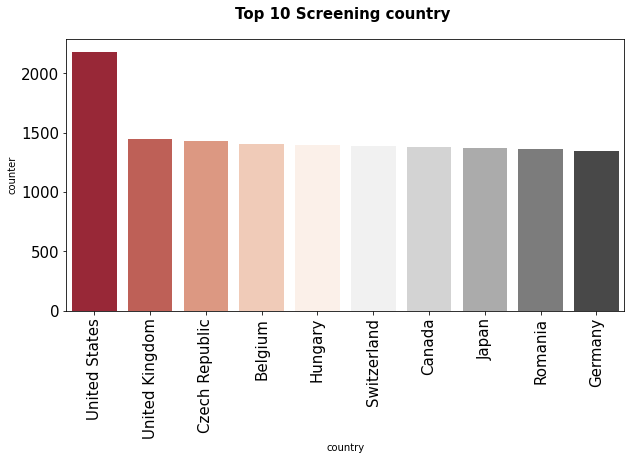

In [74]:
from matplotlib import gridspec
import matplotlib
import matplotlib.pyplot as plt



# 전체 데이터 셋에서 top 500 태그들의 분포

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(nrows=1, ncols=1)
                       #height_ratios=[1, 0.7]) 
                       #width_ratios=[17, 17])

ax = plt.subplot(gs[0])
sns.barplot(df_country_top10['country'], df_country_top10['counter'], ax=ax, palette="RdGy")
ax.set_xticklabels(df_country_top10['country'], rotation='90')
ax.set_title('Top 10 Screening country ',fontsize=15, fontweight='bold', pad=20)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
plt.show()

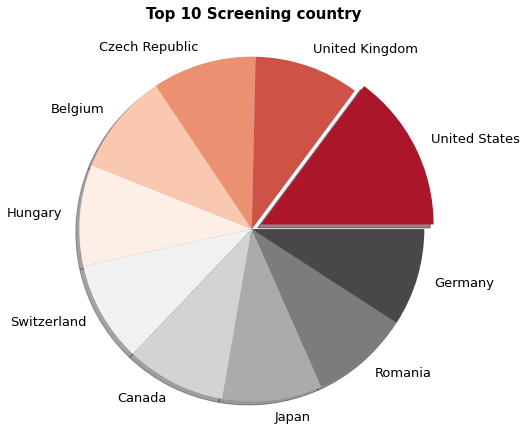

In [75]:

fig = plt.figure(figsize=(7,7))
gs = gridspec.GridSpec(nrows=1, ncols=1)
explode = [0 for _ in range(10)]
explode[0] = 0.06

ax2 = plt.subplot(gs[0])
ax2.pie(df_country_top10['counter'], labels=df_country_top10['country'],
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=10),textprops={'fontsize':13}
       )
ax2.axis('equal') 
ax2.set_title('Top 10 Screening country ',fontsize=15, fontweight='bold', pad=20)

plt.show()

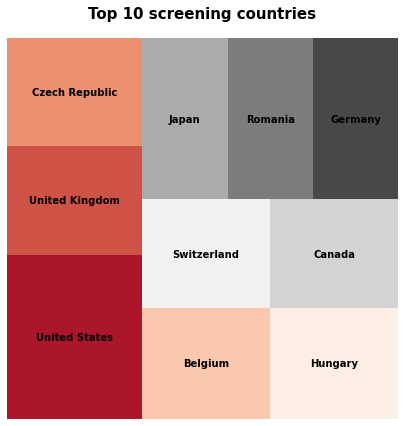

In [76]:
import squarify

fig = plt.figure(figsize=(7,7))
squarify.plot(sizes = df_country_top10['counter'], label = df_country_top10['country'], color=sns.color_palette("RdGy", n_colors=10),
             linewidth=4, text_kwargs={'fontsize':10, 'fontweight' : 'bold'})
plt.title('Top 10 screening countries', position=(0.5, 1.0+0.03), fontsize = 15, fontweight='bold', pad=20)
plt.axis('off')
plt.show()

In [77]:
# top15 뷰포인트의 상영국가값의 개수
view_counter = Counter(rs.country_single)

In [78]:
view_dfdf = pd.DataFrame(pd.Series(view_counter), columns=['counter'])

In [79]:
view_dfdf.sort_values(by = 'counter',ascending = False,inplace = True)  # 내림차순 정렬
view_dfdf = view_dfdf.reset_index()
view_dfdf.columns = ['country','counter']

In [80]:
view_dfdf['country'].count()

48

In [81]:
view_dfdf['counter']

0     454
1     389
2     389
3     388
4     376
5     368
6     368
7     367
8     366
9     365
10    363
11    361
12    360
13    360
14    360
15    358
16    358
17    358
18    357
19    356
20    355
21    355
22    355
23    354
24    353
25    352
26    352
27    351
28    351
29    351
30    347
31    345
32    345
33    334
34    327
35    326
36      2
37      2
38      2
39      2
40      2
41      1
42      1
43      1
44      1
45      1
46      1
47      1
Name: counter, dtype: int64

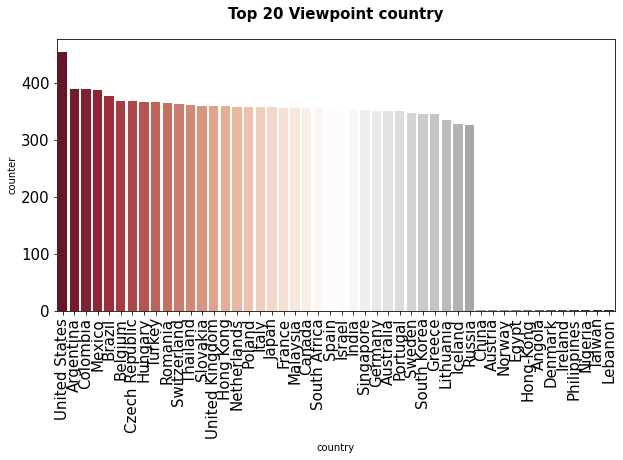

In [82]:
# 뷰포인트 기준 top 20 상영 국가들의 분포

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(nrows=1, ncols=1)

ax = plt.subplot(gs[0])
sns.barplot(view_dfdf['country'], view_dfdf['counter'], ax=ax, palette="RdGy")
ax.set_xticklabels(view_dfdf['country'], rotation='90')
ax.set_title('Top 20 Viewpoint country', fontsize=15, fontweight='bold', pad=20)

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
plt.show()

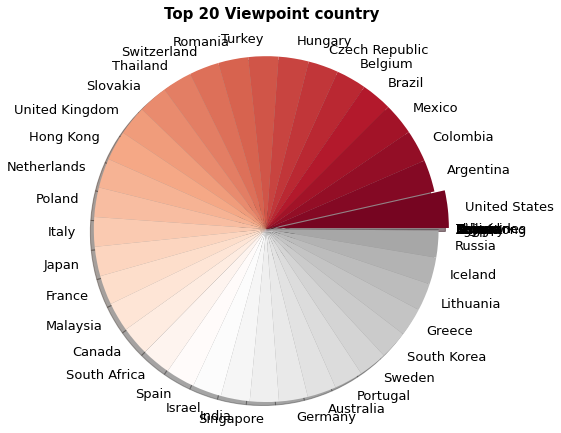

In [86]:
fig = plt.figure(figsize=(7,7))
gs = gridspec.GridSpec(nrows=1, ncols=1)
explode = [0 for _ in range(view_dfdf['country'].count())] #view_dfdf['country'].count())
explode[0] = 0.06

ax3 = plt.subplot(gs[0])
ax3.pie(view_dfdf['counter'], labels=view_dfdf['country'],
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=48), textprops={'fontsize':13}
       )
       

ax3.axis('equal') 
ax3.set_title('Top 20 Viewpoint country', fontsize=15, fontweight='bold', pad=20)
plt.show()

**얼마나 비슷할까?**

In [87]:
top_count = df_country_top15['country'].count()

In [88]:
check = list(view_dfdf['country'].unique())

In [89]:
check_list = []

In [90]:
for i in range(top_count):
    if df_country_top15['country'][i] in check :
        check_list.append(1)
    else:
        check_list.append(0)

In [91]:
print(sum(check_list)/len(check_list))

1.0
